In [86]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from subprocess import check_output
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [87]:
data = pd.read_csv('data job posts.csv')

In [88]:
data.head(2)

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False


In [89]:
data_P = data[['jobpost','Location','Title','IT','Year']]

In [90]:
data_P.head()

,jobpost,Location,Title,IT,Year
0,AMERIA Investment Consulting Company\nJOB TITL...,"Yerevan, Armenia",Chief Financial Officer,False,2004
1,International Research & Exchanges Board (IREX...,"IREX Armenia Main Office; Yerevan, Armenia \nD...",Full-time Community Connections Intern (paid i...,False,2004
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Yerevan, Armenia",Country Coordinator,False,2004
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Manila, Philippines",BCC Specialist,False,2004
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Yerevan, Armenia",Software Developer,True,2004


In [285]:
top_20=pd.DataFrame(data_P.Title.value_counts().head(20))

In [92]:
top_20

,Title
Accountant,328
Chief Accountant,219
Medical Representative,216
Sales Manager,166
Administrative Assistant,155
Lawyer,151
Software Developer,134
Project Manager,117
English Language Courses,109
Web Developer,101


In [93]:
data_t=data_P.loc[(data_P['Title']=='Accountant')|(data_P['Title']=='Chief Accountant')|(data_P['Title']=='Medical Representative')|(data_P['Title']=='Sales Manager')|(data_P['Title']=='Administrative Assistant')|(data_P['Title']=='Lawyer')|(data_P['Title']=='Software Developer')|(data_P['Title']=='Project Manager')|(data_P['Title']=='English Language Courses')|(data_P['Title']=='Web Developer')|(data_P['Title']=='Java Developer')|(data_P['Title']=='Marketing Specialist')|(data_P['Title']=='Office Manager')|(data_P['Title']=='Receptionist/ Administrative Assistant')|(data_P['Title']=='System Administrator')|(data_P['Title']=='Graphic Designer')|(data_P['Title']=='Marketing Manager')|(data_P['Title']=='Senior Java Developer')|(data_P['Title']=='Software Engineer')|(data_P['Title']=='QA Engineer')]

In [94]:
data_t=data_t.reset_index(drop=True)

In [95]:
data_t

,jobpost,Location,Title,IT,Year
0,Yerevan Brandy Company\nJOB TITLE: Software D...,"Yerevan, Armenia",Software Developer,True,2004
1,Xalt LLC\nJOB TITLE: Graphic Designer\nPOSITI...,"Yerevan, Armenia",Graphic Designer,True,2004
2,"CUTS Centre for International Trade, Economics...","London, UK",Administrative Assistant,False,2004
3,Yerevan Brandy Company\nJOB TITLE: Lawyer\nPO...,"Yerevan, Armenia",Lawyer,False,2004
4,SEF International\nJOB TITLE: Chief Accountan...,"Yerevan, Armenia",Chief Accountant,False,2004
...,...,...,...,...,...
2454,EpygiArm LLC\n\n\nTITLE: Web Developer\n\n\nT...,"Yerevan, Armenia",Web Developer,True,2015
2455,Alpha Food Service LLC\n\n\nTITLE: Graphic De...,"Yerevan, Armenia",Graphic Designer,True,2015
2456,BigBek LLC\n\n\nTITLE: QA Engineer\n\n\nSTART...,"Yerevan, Armenia",QA Engineer,False,2015
2457,Career Center NGO\n\n\nTITLE: Receptionist/ A...,"Yerevan, Armenia",Receptionist/ Administrative Assistant,False,2015


In [96]:
data_PY=data_t.groupby(by=['Year','Title'])[['Year']].count().add_prefix('count_jobtype_in_').reset_index()

In [97]:
data_PY

,Year,Title,count_jobtype_in_Year
0,2004,Accountant,16
1,2004,Administrative Assistant,14
2,2004,Chief Accountant,13
3,2004,Graphic Designer,4
4,2004,Java Developer,2
...,...,...,...
225,2015,Senior Java Developer,19
226,2015,Software Developer,13
227,2015,Software Engineer,5
228,2015,System Administrator,8


In [98]:
data_PY_W=data_PY.pivot_table(index='Year',columns='Title',values='count_jobtype_in_Year')

In [99]:
data_PY_W

Title,Accountant,Administrative Assistant,Chief Accountant,English Language Courses,Graphic Designer,Java Developer,Lawyer,Marketing Manager,Marketing Specialist,Medical Representative,Office Manager,Project Manager,QA Engineer,Receptionist/ Administrative Assistant,Sales Manager,Senior Java Developer,Software Developer,Software Engineer,System Administrator,Web Developer
Year,,,,,,,,,,,,,,,,,,,,
2004,16.0,14.0,13.0,NaN,4.0,2.0,5.0,2.0,2.0,NaN,4.0,5.0,NaN,NaN,3.0,NaN,4.0,1.0,2.0,6.0
2005,27.0,14.0,16.0,16.0,6.0,3.0,4.0,5.0,2.0,7.0,12.0,6.0,1.0,2.0,3.0,NaN,13.0,9.0,3.0,5.0
2006,28.0,22.0,20.0,NaN,7.0,6.0,9.0,2.0,5.0,14.0,10.0,4.0,NaN,2.0,8.0,NaN,13.0,11.0,2.0,9.0
2007,42.0,18.0,28.0,4.0,4.0,19.0,9.0,7.0,11.0,12.0,14.0,6.0,2.0,3.0,9.0,4.0,17.0,7.0,3.0,6.0
2008,38.0,13.0,27.0,1.0,6.0,15.0,16.0,12.0,5.0,17.0,3.0,12.0,3.0,3.0,24.0,6.0,10.0,6.0,17.0,7.0
2009,21.0,10.0,15.0,11.0,4.0,2.0,17.0,2.0,7.0,16.0,3.0,9.0,NaN,6.0,13.0,7.0,7.0,1.0,8.0,1.0
2010,22.0,10.0,13.0,37.0,4.0,3.0,13.0,5.0,6.0,33.0,5.0,10.0,2.0,7.0,14.0,5.0,3.0,4.0,3.0,5.0
2011,23.0,5.0,26.0,3.0,9.0,6.0,11.0,6.0,9.0,24.0,7.0,12.0,6.0,10.0,12.0,7.0,9.0,12.0,7.0,6.0
2012,24.0,12.0,15.0,5.0,9.0,3.0,24.0,11.0,8.0,28.0,5.0,11.0,8.0,11.0,27.0,12.0,18.0,7.0,6.0,10.0


#### Stacked chart

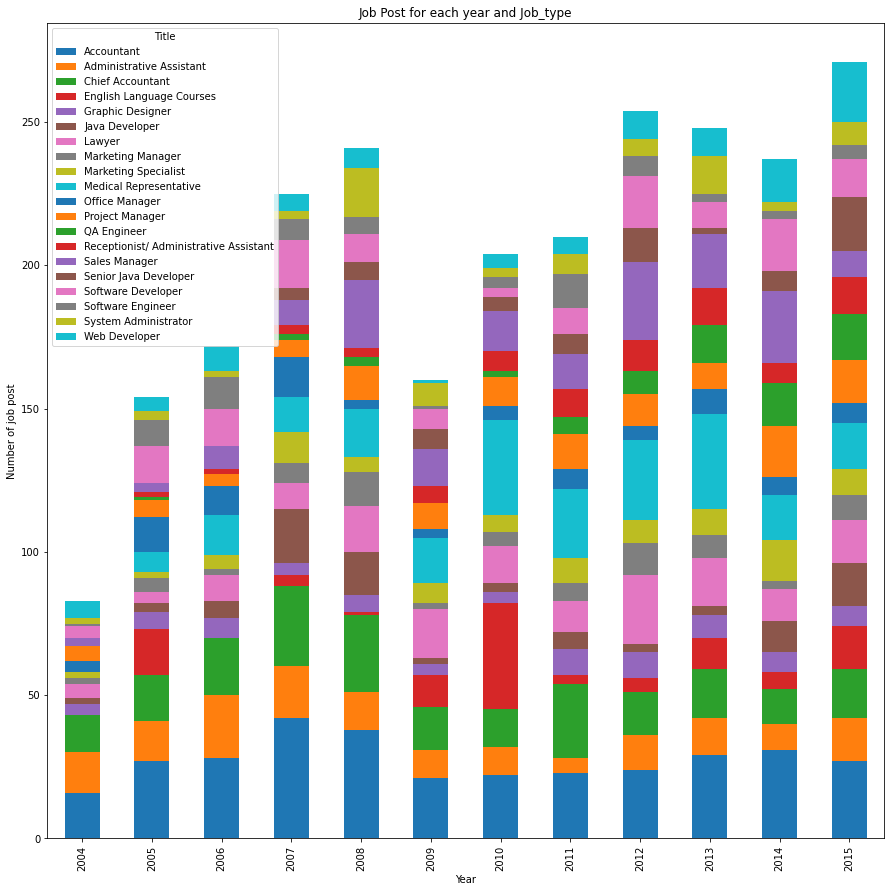

In [100]:
from matplotlib import pyplot as plt
data_PY_W.plot(kind='bar',figsize=(15,15),stacked=True)
plt.title('Job Post for each year and Job_type')
plt.xlabel('Year')
plt.ylabel('Number of job post')
plt.savefig('stackedbarchart.jpeg')
plt.show()

In [102]:
import seaborn as sns

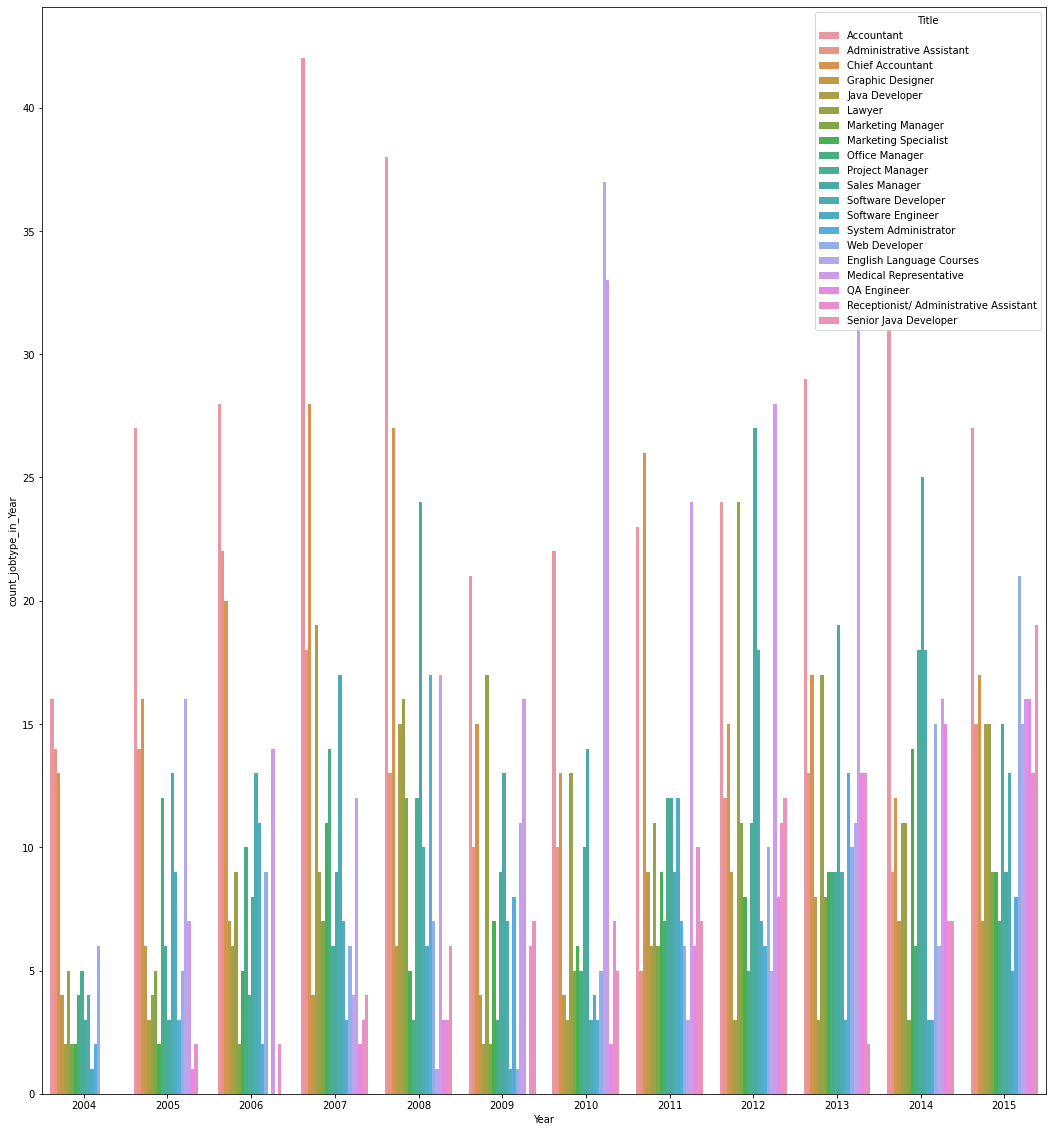

In [103]:
fig_dims = (18,20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=data_PY, x='Year', y='count_jobtype_in_Year',hue='Title',dodge=True,ax=ax)

### Finding Job nature

In [104]:
data_P=data_P[data_P['Title'].isnull()==False]
data_P.reset_index(inplace=True)
data_P.head(5)

,index,jobpost,Location,Title,IT,Year
0,0,AMERIA Investment Consulting Company\nJOB TITL...,"Yerevan, Armenia",Chief Financial Officer,False,2004
1,1,International Research & Exchanges Board (IREX...,"IREX Armenia Main Office; Yerevan, Armenia \nD...",Full-time Community Connections Intern (paid i...,False,2004
2,2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Yerevan, Armenia",Country Coordinator,False,2004
3,3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Manila, Philippines",BCC Specialist,False,2004
4,4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Yerevan, Armenia",Software Developer,True,2004


In [133]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy
nlp=spacy.load('en')
#nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [135]:
X=data_P['Title']

#### Creating Corpus


In [136]:
import re
corpus = []
for i in range(0, len(X)):
    review = re.sub(r'\W', ' ', str(X[i]))
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^[a-z]\s+', ' ', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)

#### Remove punctuations from all title

In [137]:
# Remove punctuations from all title
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(corpus))

data_words[0]

['chief', 'financial', 'officer']

### Define Stopwords, bigram model and lemmatization for title data

In [138]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=3, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [139]:
stop_words = stopwords.words('english')
stop_words.extend(['armenian', 'armenia', 'job', 'title', 'position','location','responsibilities','applications','procedures','deadline','required','qualifications','renumerations','salary','date','company','lic'])

In [140]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [141]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['chief', 'financial', 'officer']]


In [142]:
data_lemmatized[0:10]

[['chief', 'financial', 'officer'],
 ['community', 'connection', 'intern', 'pay', 'internship'],
 ['country', 'coordinator'],
 [],
 ['software', 'developer'],
 [],
 ['chief', 'finance', 'assistant'],
 ['pay', 'part', 'programmatic', 'intern'],
 ['assistant', 'manage', 'director'],
 ['program', 'assistant']]

In [143]:
# few null value is also coming so we are going to remove null from list
list2 = [x for x in data_lemmatized if x != []]

In [144]:
for i in range(len(list2)):
    list2[i] = ' '.join(list2[i])


In [145]:
list2[0:5]

['chief financial officer',
 'community connection intern pay internship',
 'country coordinator',
 'software developer',
 'chief finance assistant']

### Now we are selecting 1500 job title

In [146]:
import nltk

In [147]:
JobTypecount = {}
for data in list2:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in JobTypecount.keys():
            JobTypecount[word] = 1
        else:
            JobTypecount[word] += 1

In [148]:
len(JobTypecount)

1712

In [149]:
import heapq
# Selecting best 100 features
freq_words = heapq.nlargest(1500,JobTypecount,key=JobTypecount.get)

In [150]:
%%capture
#gather features
text = " ".join(freq_words)

In [151]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

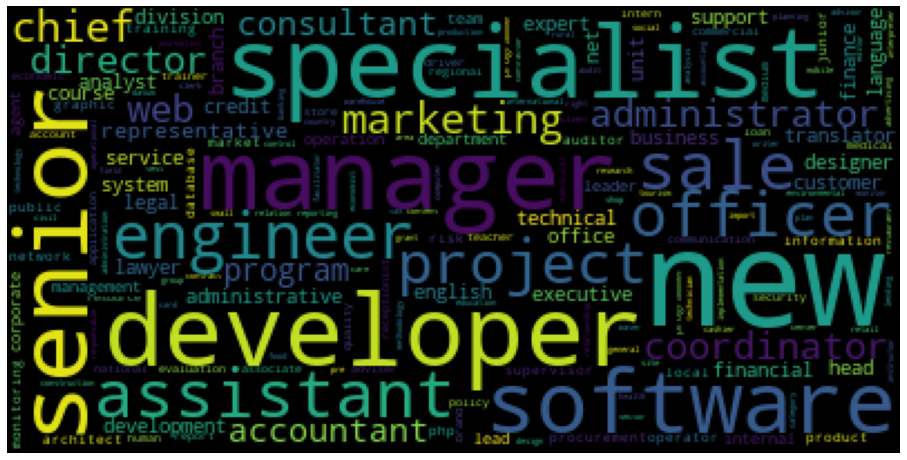

In [152]:
wordcloud = WordCloud(stopwords=[],max_font_size=60).generate(text)
plt.figure(figsize=(16,12))

# plot wordcloud in matplotlib
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Job nature over the time

In [156]:
for i in range(len(data_lemmatized)):
    data_lemmatized[i] = ' '.join(data_lemmatized[i])

In [157]:
date_field=data_P['Year'].tolist()
len(date_field)

18973

In [158]:
Job_year = pd.DataFrame(np.column_stack([data_lemmatized,date_field]), 
                               columns=['Job_title','Year'])

In [161]:
Job_year.head(5)

,Job_title,Year
0,chief financial officer,2004
1,community connection intern pay internship,2004
2,country coordinator,2004
3,,2004
4,software developer,2004


In [160]:
#Converting year to numeric value 
Job_year['Year']=Job_year['Year'].astype('int')

In [162]:
Job_year.dtypes

Job_title    object
Year          int32
dtype: object

In [163]:
Job_year.Year.value_counts()

2012    2140
2015    2009
2013    2009
2014    1980
2008    1782
2011    1695
2007    1538
2010    1506
2009    1191
2005    1138
2006    1111
2004     874
Name: Year, dtype: int64

In [164]:
#We will devide year into 3 equidistant bins to find the job nature over the period
Job_year['Year_bins']=pd.cut(Job_year['Year'],3,labels=['Phase1','Phase2','Phase3'])

In [205]:
Job_year.pivot_table(values='Year',index='Year_bins',aggfunc=['min','max','count'])

,min,max,count
,Year,Year,Year
Year_bins,,,
Phase1,2004,2007,4661
Phase2,2008,2011,6174
Phase3,2012,2015,8138


### Job nature change over the Phase1 (2004 to 2007)

In [218]:
Phase1=Job_year[Job_year.Year_bins=='Phase1']
P2=Phase1.groupby(['Job_title']).Year.agg(['count']).reset_index()
P3=P2.sort_values(by=['count'],ascending=[False]).reset_index(drop=True)
P3.iloc[1:20]
#Top 20

,Job_title,count
1,developer,83
2,chief accountant,82
3,software developer,79
4,administrative assistant,77
5,manager,70
6,representative,44
7,receptionist,41
8,office manager,41
9,software,40
10,senior software developer,32


In [206]:
YY=Job_year[Job_year['Year_bins']=='Phase1'].iloc[:,0]

In [207]:
# Selecting top 500 jobs for the wordcloud

titlecount = {}
for data in YY:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in titlecount.keys():
            titlecount[word] = 1
        else:
            titlecount[word] += 1

In [208]:
# import heapq
freq_words = heapq.nlargest(500,JobTypecount,key=JobTypecount.get)

In [209]:
%%capture
#gather features
text = " ".join(freq_words)

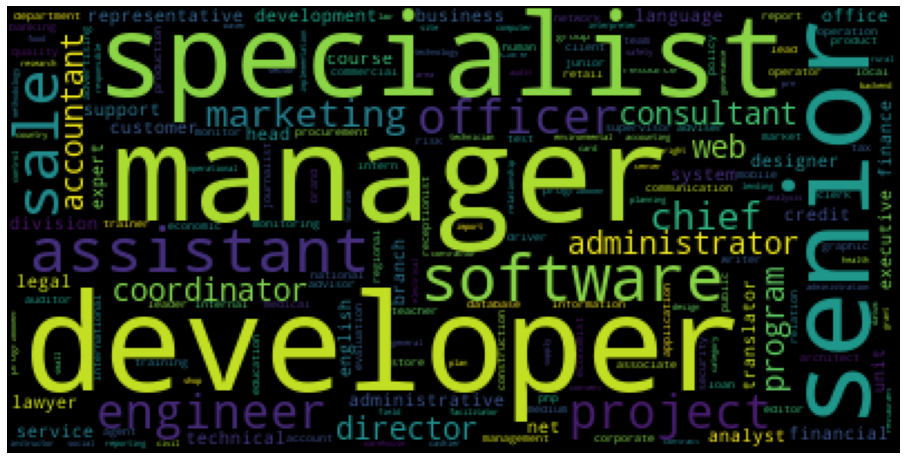

In [210]:
# Wordcloud need to draw for nature of job
wordcloud = WordCloud(stopwords=[],max_font_size=60).generate(text)
plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Job nature change over the Phase2 (2008 to 2011)

In [219]:
Phase1=Job_year[Job_year.Year_bins=='Phase2']
P2_2=Phase1.groupby(['Job_title']).Year.agg(['count']).reset_index()
P3_2=P2_2.sort_values(by=['count'],ascending=[False]).reset_index(drop=True)
P3_2.iloc[1:20]
#Top 20

,Job_title,count
1,manager,125
2,representative,105
3,developer,103
4,chief accountant,92
5,software developer,73
6,lawyer,64
7,sale manager,63
8,assistant,61
9,english language course,52
10,software,50


In [213]:
YY_1=Job_year[Job_year['Year_bins']=='Phase2'].iloc[:,0]

In [214]:
# Selecting top 500 jobs for the wordcloud

titlecount = {}
for data in YY_1:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in titlecount.keys():
            titlecount[word] = 1
        else:
            titlecount[word] += 1
            
# import heapq
freq_words = heapq.nlargest(500,titlecount,key=titlecount.get)

In [215]:
%%capture
#gather features
text = " ".join(freq_words)

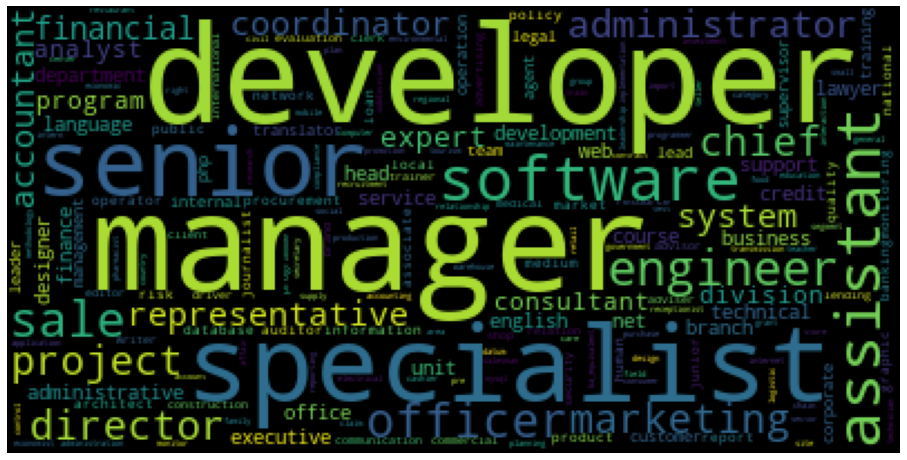

In [216]:
wordcloud = WordCloud(stopwords=[],max_font_size=60).generate(text)
plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Job nature change over the Phase3 (2008 to 2011)

In [220]:
Phase1=Job_year[Job_year.Year_bins=='Phase3']
P2_3=Phase1.groupby(['Job_title']).Year.agg(['count']).reset_index()
P3_3=P2_3.sort_values(by=['count'],ascending=[False]).reset_index(drop=True)
P3_3.iloc[1:20]
#Top 20

,Job_title,count
1,developer,255
2,manager,151
3,senior developer,119
4,representative,99
5,software developer,93
6,sale manager,86
7,assistant,80
8,web developer,79
9,chief accountant,77
10,lawyer,75


In [221]:
YY_2=Job_year[Job_year['Year_bins']=='Phase3'].iloc[:,0]

In [223]:
# Selecting top 500 jobs for the wordcloud

titlecount = {}
for data in YY_2:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in titlecount.keys():
            titlecount[word] = 1
        else:
            titlecount[word] += 1
            
# import heapq
freq_words = heapq.nlargest(500,titlecount,key=titlecount.get)

In [224]:
%%capture
#gather features
text = " ".join(freq_words)

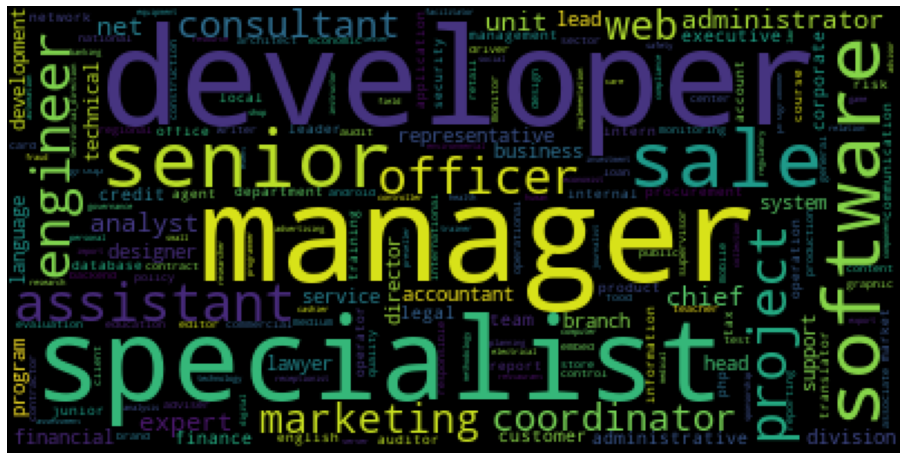

In [225]:
wordcloud = WordCloud(stopwords=[],max_font_size=60).generate(text)
plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### IT Job Classification

In [232]:
data = pd.read_csv('data job posts.csv')
data.head(2)

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False


In [233]:
data.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [236]:
data_I = data[['JobRequirment','IT','Title','RequiredQual']]
data_I.head(2)

,JobRequirment,IT,Title,RequiredQual
0,- Supervises financial management and administ...,False,Chief Financial Officer,"To perform this job successfully, an\nindividu..."
1,NaN,False,Full-time Community Connections Intern (paid i...,- Bachelor's Degree; Master's is preferred;\n-...


In [252]:
# Defining X
data_I['X1'] = data_I['Title'].str.cat(data_I['JobRequirment'], sep =" ").str.cat(data_I['RequiredQual'], sep =" ")
X=data_I['X1']

# Defining Y
data_I['IT_y']=np.where(data_I['IT'] == False,0,1)
y=data_I['IT_y']

C:\Users\Nanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Nanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [253]:
# Creating the corpus
import re
corpus = []
for i in range(0, len(X)):
    review = re.sub(r'\W', ' ', str(X[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^[a-z]\s+', ' ', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)

In [254]:
corpus[0]

'chief financial officer supervises financial management and administrative staff including assigning responsibilities reviewing employees work processes and products counseling employees giving performance evaluations and recommending disciplinary action serves as member of management team participating in both strategic and operational planning for the company directs and oversees the company financial management activities including establishing and monitoring internal controls managing cash and investments and managing the investment portfolio in collaboration with the investment team leader this includes but is not limited to evaluation of investment risk concentration risk fund deployment levels adequacy of loss and liquidity reserves assists investment team in development of proper documentation and internal systems directs and oversees the annual budgeting process including developing projections for financial planning and preparing budgets prepares external and internal financ

#### Stemming

In [255]:
from nltk.stem import PorterStemmer
#sentences = nltk.sent_tokenize(paragraph)
stemmer = PorterStemmer()


for i in range(len(corpus)):
    words = nltk.word_tokenize(corpus[i])
    words = [stemmer.stem(word) for word in words]
    corpus[i] = ' '.join(words)

In [256]:
corpus[0]

'chief financi offic supervis financi manag and administr staff includ assign respons review employe work process and product counsel employe give perform evalu and recommend disciplinari action serv as member of manag team particip in both strateg and oper plan for the compani direct and overse the compani financi manag activ includ establish and monitor intern control manag cash and invest and manag the invest portfolio in collabor with the invest team leader thi includ but is not limit to evalu of invest risk concentr risk fund deploy level adequaci of loss and liquid reserv assist invest team in develop of proper document and intern system direct and overse the annual budget process includ develop project for financi plan and prepar budget prepar extern and intern financi manag report such as audit financi statement tax return and report for the board of director and compani staff develop implement and maintain effici and effect account system and control to ensur complianc with na

### Creating the Tf-Idf model directly

In [257]:
# Creating the Tf-Idf model directly
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 1000, min_df = 0.05, max_df = 0.8, stop_words = stopwords.words('english'))

X = vectorizer.fit_transform(corpus).toarray()

In [262]:
X.shape

(19001, 331)

### Splitting the train and test data

In [263]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(X,
                                              y,
                                              test_size=0.2,
                                              random_state=123)

### Building Naive Bayes Model

In [264]:
from sklearn.naive_bayes import GaussianNB

nb_clf=GaussianNB()

nb_clf.fit(train_x,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [266]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(15200, 331)
(3801, 331)
(15200,)
(3801,)


### Model Evaluation

In [267]:
#Predicting the test cases
from sklearn import metrics
test_accuracy=metrics.accuracy_score(test_y,nb_clf.predict(test_x))
print('test_accuracy: ',test_accuracy)

train_accuracy=metrics.accuracy_score(train_y,nb_clf.predict(train_x))
print('train_accuracy: ',train_accuracy)

test_accuracy:  0.8166272033675348
train_accuracy:  0.8010526315789473


In [268]:
print('AUC train :',metrics.roc_auc_score(train_y,nb_clf.predict(train_x)))
print('AUC test :',metrics.roc_auc_score(test_y,nb_clf.predict(test_x)))

AUC train : 0.8380416215565981
AUC test : 0.8438935318907146


In [269]:
from sklearn.metrics import classification_report
print(classification_report(test_y,nb_clf.predict(test_x)))

              precision    recall  f1-score   support

           0       0.97      0.80      0.87      3017
           1       0.53      0.89      0.67       784

    accuracy                           0.82      3801
   macro avg       0.75      0.84      0.77      3801
weighted avg       0.88      0.82      0.83      3801



Text(0.5, 15.0, 'Predicted label')

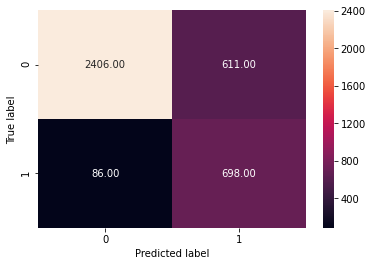

In [270]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix(test_y,
                            nb_clf.predict(test_x), [0,1] )
cm

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Text Cluatering

In [271]:
train_x.shape

(15200, 331)

In [272]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [273]:
title=list2
title[0:5]

['chief financial officer',
 'community connection intern pay internship',
 'country coordinator',
 'software developer',
 'chief finance assistant']

In [274]:
# Creating the Tf-Idf model directly
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 0.01, max_df = 0.9, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(title).toarray()

In [275]:
X.shape

(16141, 50)

### Cluster Error

In [276]:
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(X)
    cluster_errors.append( clusters.inertia_ )

In [277]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

,num_clusters,cluster_errors
0,1,13321.446096
1,2,12085.523278
2,3,11072.016403
3,4,10369.901913
4,5,10061.528460
5,6,9606.146470
6,7,9319.940244
7,8,8872.110384
8,9,8603.830380
9,10,8235.469633


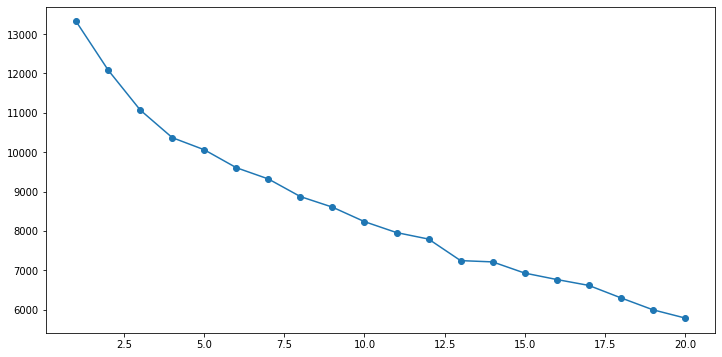

In [278]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Silhoute co efficient

In [279]:
# calculate SC for K=3 through K=12
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    scores.append(metrics.silhouette_score(X, km.labels_))

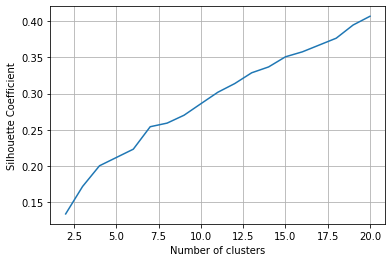

In [280]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [281]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [282]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 engineer
 officer
 senior
 software
 coordinator
 administrator
 representative
 director
 consultant
 expert
Cluster 1:
 developer
 software
 senior
 net
 web
 designer
 business
 team
 analyst
 program
Cluster 2:
 assistant
 administrative
 project
 executive
 program
 sale
 director
 office
 finance
 manager
Cluster 3:
 manager
 sale
 project
 marketing
 office
 branch
 program
 finance
 financial
 customer
Cluster 4:
 specialist
 marketing
 senior
 sale
 support
 management
 development
 credit
 unit
 financial
